## [Exercises](https://www.learnpytorch.io/02_pytorch_classification/#exercises)

[Continued...]


### 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/)

```python
# Code for creating a spiral dataset from CS231n
import numpy as np

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
  
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
```

- Construct a model capable of fitting the data (you may need a
combination of linear and non-linear layers).
- Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
- Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
- Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

2.1.0+cu121
cuda


## Spirals Data Creation Function from CS231n

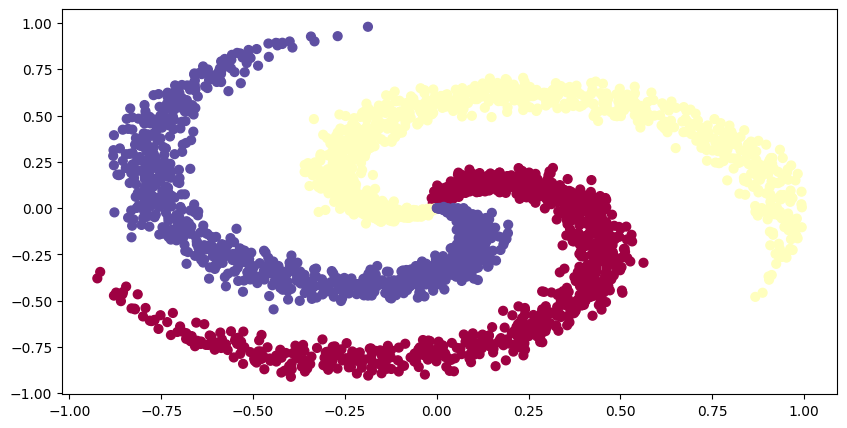

In [2]:
# Code for creating a spiral dataset from CS231n

N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [3]:
# Conversion numpy arrays to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X, y

(tensor([[-0.0000e+00,  0.0000e+00],
         [-7.7400e-05,  9.9800e-04],
         [ 9.5357e-04,  1.7603e-03],
         ...,
         [-5.5757e-01,  8.2772e-01],
         [-5.4343e-01,  8.3826e-01],
         [-4.5833e-01,  8.8878e-01]]),
 tensor([0, 0, 0,  ..., 2, 2, 2]))

In [4]:
from sklearn.model_selection import train_test_split

# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [5]:
# Input and Output features
print(f'Input_features: {X_train.shape}')

print(f'Unique output classes: {torch.unique(y_train)}')
print(f'Output_features: {torch.unique(y_train).shape}')

Input_features: torch.Size([2400, 2])
Unique output classes: tensor([0, 1, 2])
Output_features: torch.Size([3])


In [6]:
# Building neural network model
class spiralModel(nn.Module):
  def __init__(self, input_features, output_features):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(input_features, 32),
        nn.ReLU(),
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(64, output_features)
    )

  def forward(self, x):
    return self.linear_stack(x)

model = spiralModel(input_features = 2, output_features = 3).to(device)
model

spiralModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [7]:
# Setting up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.01)

In [8]:
next(model.parameters()).device

device(type='cuda', index=0)

In [9]:
# Getting prediction probabilities for multi-class classification
model.eval()

with torch.inference_mode():
  y_logits = model(X_test.to(device))

y_logits[:5], y_test[:5]

(tensor([[ 0.1293, -0.1806,  0.1441],
         [ 0.1061, -0.2094,  0.0706],
         [ 0.1312, -0.1975,  0.1485],
         [ 0.0955, -0.1876,  0.0775],
         [ 0.1244, -0.2218,  0.0642]], device='cuda:0'),
 tensor([1, 1, 1, 0, 2]))

In [10]:
# Conversion of models raw logits outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:5]

tensor([[0.3638, 0.2669, 0.3693],
        [0.3711, 0.2707, 0.3582],
        [0.3653, 0.2630, 0.3717],
        [0.3656, 0.2754, 0.3590],
        [0.3775, 0.2670, 0.3555]], device='cuda:0')

In [11]:
# Conversion of model prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:40], y_test[:40]

(tensor([2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'),
 tensor([1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2,
         1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 1]))

In [12]:
# Using inbuilt accuracy function for torchmetrics
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 6.9 MB/s eta 0:00:00


In [13]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task='multiclass', num_classes = 3).to(device)
torchmetric_accuracy(y_preds, y_test.to(device))

tensor(0.3650, device='cuda:0')

In [14]:
# Building Train/Test Loop
torch.manual_seed(42)

epochs = 100

# Tracking
epoch_count = []
loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []

# Placing data on CUDA
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train loop
for epoch in range(epochs):
  model.train()
  y_logits = model(X_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
  loss = loss_fn(y_logits, y_train)
  acc = torchmetric_accuracy(y_train, y_pred) * 100
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Test Loop
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
    test_loss = loss_fn(test_logits, y_test)
    test_acc = torchmetric_accuracy(y_test, test_preds) * 100

  if epoch % 10 == 0 or epoch == epochs - 1:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    train_acc_values.append(acc)
    test_acc_values.append(test_acc)
    print(f'Epoch: {epoch} ---- Train Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')

Epoch: 0 ---- Train Loss: 1.1113 | Acc: 31.62% | Test Loss: 1.0653 | Test Acc: 40.17%
Epoch: 10 ---- Train Loss: 0.7322 | Acc: 58.38% | Test Loss: 0.7190 | Test Acc: 56.50%
Epoch: 20 ---- Train Loss: 0.6129 | Acc: 66.42% | Test Loss: 0.5814 | Test Acc: 64.17%
Epoch: 30 ---- Train Loss: 0.4561 | Acc: 79.33% | Test Loss: 0.4354 | Test Acc: 77.50%
Epoch: 40 ---- Train Loss: 0.3214 | Acc: 89.21% | Test Loss: 0.3043 | Test Acc: 89.67%
Epoch: 50 ---- Train Loss: 0.2112 | Acc: 93.79% | Test Loss: 0.2029 | Test Acc: 95.17%
Epoch: 60 ---- Train Loss: 0.1471 | Acc: 95.46% | Test Loss: 0.1395 | Test Acc: 97.00%
Epoch: 70 ---- Train Loss: 0.1082 | Acc: 96.54% | Test Loss: 0.1010 | Test Acc: 98.33%
Epoch: 80 ---- Train Loss: 0.0851 | Acc: 97.21% | Test Loss: 0.0793 | Test Acc: 98.50%
Epoch: 90 ---- Train Loss: 0.0761 | Acc: 97.42% | Test Loss: 0.0662 | Test Acc: 98.83%
Epoch: 99 ---- Train Loss: 0.0610 | Acc: 98.17% | Test Loss: 0.0609 | Test Acc: 98.67%


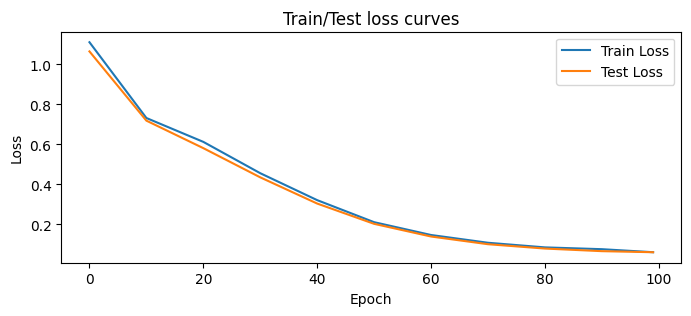

In [15]:
# Plot loss curves
plt.figure(figsize=(8,3))
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Train/Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

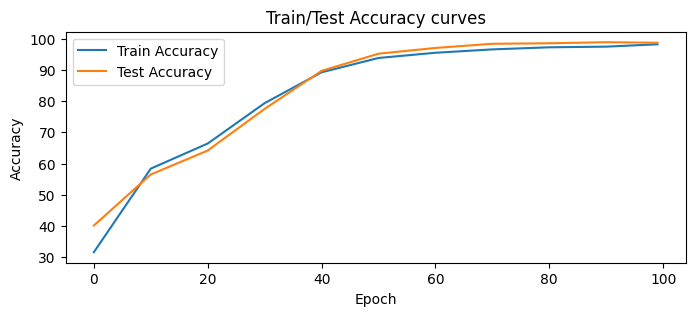

In [16]:
# Plot accuracy curves
plt.figure(figsize=(8,3))
plt.plot(epoch_count, np.array(torch.tensor(train_acc_values).numpy()), label="Train Accuracy")
plt.plot(epoch_count, np.array(torch.tensor(test_acc_values).numpy()), label="Test Accuracy")
plt.title("Train/Test Accuracy curves")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend();

In [17]:
# Making and Evaluating Predictions with a PyTorch Multi-Class Model
model.eval()

with torch.inference_mode():
  y_logits = model(X_test)

y_logits[:10]

tensor([[  4.6183,  12.6230, -15.1740],
        [ -1.2169,   5.4051,  -4.2300],
        [  4.1373,  11.4743, -13.2903],
        [  4.8355,  -2.1499,  -1.4590],
        [ -1.8578,  -1.2778,   3.5374],
        [ -2.3516,   3.6617,  -1.5072],
        [ -2.7438,   5.0154,  -2.7947],
        [  0.5112,  -3.7817,   3.6785],
        [  4.6361,  -3.1736,   0.1017],
        [ -1.3310,  -1.4135,   3.1924]], device='cuda:0')

In [18]:
# Transform logits -> Prediction probbailities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[3.3379e-04, 9.9967e-01, 8.4680e-13],
        [1.3289e-03, 9.9861e-01, 6.5303e-05],
        [6.5054e-04, 9.9935e-01, 1.7563e-11],
        [9.9724e-01, 9.2273e-04, 1.8413e-03],
        [4.4817e-03, 8.0042e-03, 9.8751e-01],
        [2.4262e-03, 9.9193e-01, 5.6447e-03],
        [4.2645e-04, 9.9917e-01, 4.0527e-04],
        [4.0394e-02, 5.5197e-04, 9.5905e-01],
        [9.8898e-01, 4.0132e-04, 1.0616e-02],
        [1.0631e-02, 9.7896e-03, 9.7958e-01]], device='cuda:0')

In [19]:
# Prediction probabilities -> Pred labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:20], y_test[:20]

(tensor([1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2],
        device='cuda:0'),
 tensor([1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2],
        device='cuda:0'))

In [20]:
import requests
from pathlib import Path

# Download helper function from opensource scripts files
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download')
else:
  print('Downloading helper_function.py')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
  print('Download complete')

Download complete


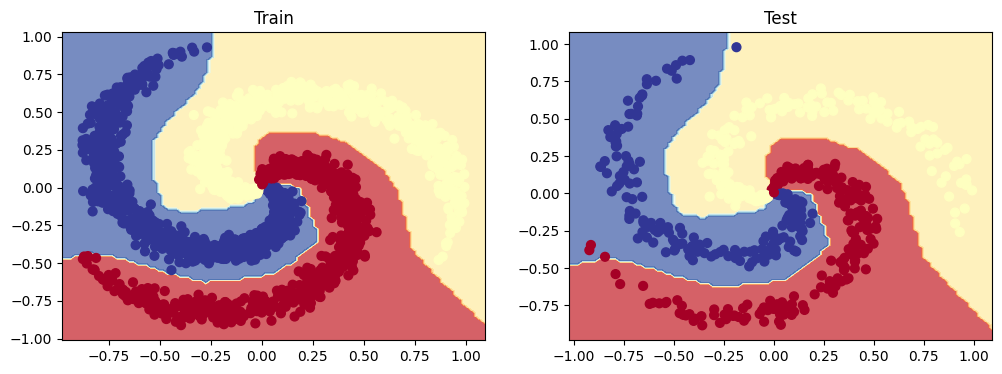

In [21]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)